<div style="border-radius: 0 40px; border: 2px solid #ffea00; padding: 10px; background-color: #6082B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">Heart Attack</h1>
</div>

![heart_pic.png](https://pfst.cf2.poecdn.net/base/image/2ce67097d28399a71d81ec4418af5d3c3ff40e08f515e91541778b7a1d7141ba?w=1024&h=1024&pmaid=54522867)

<div style="border-radius: 0px 40px; border: 2px solid #ffea00; padding: 10px; background-color: #6082B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">About this dataset</h1>
</div>

`Age` : Age of the patient

`Sex `: Sex of the patient

`exang`: exercise induced angina (1 = yes; 0 = no)

`ca`: number of major vessels (0-3)

`cp` : Chest Pain type chest pain type

- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic

`trtbps` : resting blood pressure (in mm Hg)

`chol` : cholestoral in mg/dl fetched via BMI sensor

`fbs` : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

`rest_ecg` : resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

`thalach` : maximum heart rate achieved

`target` : 0= less chance of heart attack 1= more chance of heart attack n

<div style="border-radius: 0px 40px; border: 2px solid #ffea00; padding: 10px; background-color: #6082B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">Import Libaries</h1>
</div>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# import modals
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

# preporccessing
from sklearn.preprocessing import LabelEncoder,StandardScaler

# model selection 
from sklearn.model_selection import train_test_split,cross_val_score

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


import warnings
warnings.filterwarnings('ignore')


<div style="border-radius: 0px 40px; border: 2px solid #ffea00; padding: 10px; background-color: #6082B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">Read Dataset</h1>
</div>

In [2]:
df=pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


<div style="border-radius: 0px 30px; border: 2px solid #ffea00; padding: 3px; background-color: #6082B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 20px;">Data Understand</h1>
</div>

In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


<div style="border-radius: 0px 30px; border: 2px solid #ffea00; padding: 3px; background-color: #6082B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 20px;">Rename Columns</h1>
</div>
  

In [7]:
df.rename(columns={
    "age":"Age",
    "sex":"Sex",
    "cp":"ChestPain",
    "trtbps":"RestingBloodPressure",
    "chol":"Cholesterol",
    "fbs":"FastingBloodSugar",
    "restecg":"RestingECG",
    "thalachh":"MaxHeartRate",
    "exng":"ExcerciseAngina",
    "oldpeak":"OldPeak",
    "slp":"STSlope",
    "caa":"nMajorVessels",
    "thall":"Thalium",
    "output":"Status"
}, inplace=True)


<div style="border-radius: 0px 40px; border: 2px solid #ffea00; padding: 10px; background-color: #6082B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">Data Cleaning</h1>
</div>

<div style="border-radius: 0px 30px; border: 2px solid #ffea00; padding: 3px; background-color: #6082B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 20px;">Missing Value</h1>
</div>

In [8]:
df.isnull().sum()

Age                     0
Sex                     0
ChestPain               0
RestingBloodPressure    0
Cholesterol             0
FastingBloodSugar       0
RestingECG              0
MaxHeartRate            0
ExcerciseAngina         0
OldPeak                 0
STSlope                 0
nMajorVessels           0
Thalium                 0
Status                  0
dtype: int64


<div style="border-radius:0px 30px; border: 2px solid #ffea00; padding: 3px; background-color: #6082B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 20px;">Drop Duplicated</h1>
</div>

In [9]:
print("total duplicat values : ",df.duplicated().sum())

total duplicat values :  1


<div style="border-radius:0px 40px; border: 2px solid #ffea00; padding: 3px; background-color: #6082B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 24px;">Statistical Summary</h1>
</div>

In [10]:
df.describe()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<div style="border-radius:0px 30px; border: 2px solid #ffea00; padding: 3px; background-color: #6082B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 20px;">Outlier Detection</h1>
</div>

In [11]:
df.dtypes

Age                       int64
Sex                       int64
ChestPain                 int64
RestingBloodPressure      int64
Cholesterol               int64
FastingBloodSugar         int64
RestingECG                int64
MaxHeartRate              int64
ExcerciseAngina           int64
OldPeak                 float64
STSlope                   int64
nMajorVessels             int64
Thalium                   int64
Status                    int64
dtype: object

<Axes: >

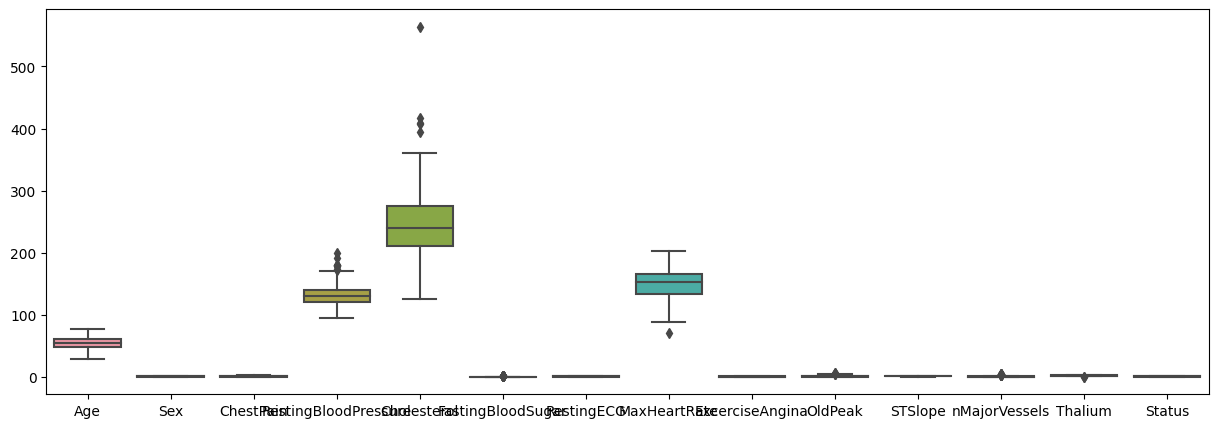

In [12]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df)

In [13]:
for col in df.columns:
    Q1=np.percentile(df[col],25,interpolation='midpoint')
    Q3=np.percentile(df[col],75,interpolation='midpoint')
    IQR=Q3-Q1
    lower_bound=Q1-(1.5*IQR)
    upper_bound=Q3+(1.5*IQR)
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


<Axes: >

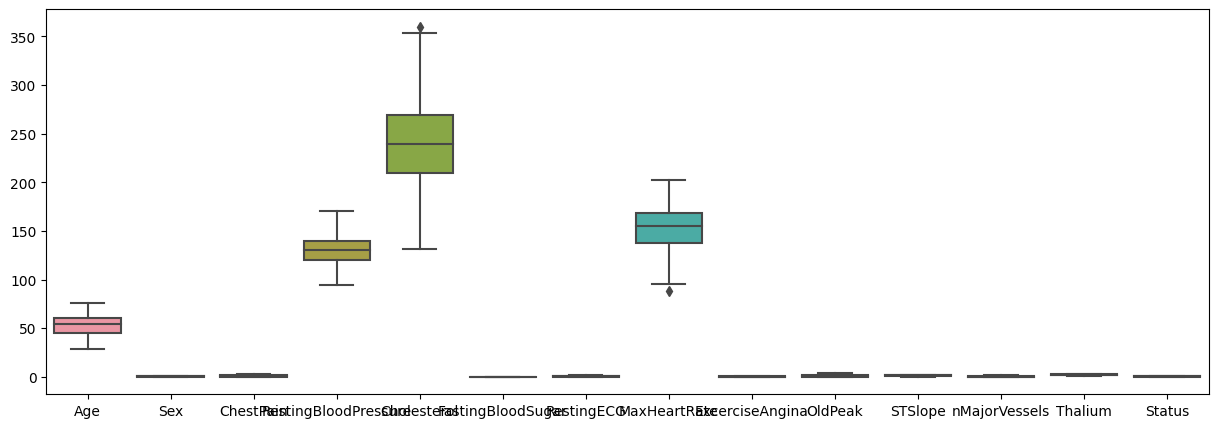

In [14]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df)

<div style="border-radius: 0px 40px; border: 2px solid #ffea00; padding: 10px; background-color: #6082B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">Exploratory Data Analysis (EDA) </h1>
</div>

In [15]:
df.columns

Index(['Age', 'Sex', 'ChestPain', 'RestingBloodPressure', 'Cholesterol',
       'FastingBloodSugar', 'RestingECG', 'MaxHeartRate', 'ExcerciseAngina',
       'OldPeak', 'STSlope', 'nMajorVessels', 'Thalium', 'Status'],
      dtype='object')

##### 1) What is the distribution of age among patients in the dataset?
- understand the age demographics of the patients in the dataset.

In [16]:
df["Age"].unique()

array([37, 41, 56, 57, 44, 54, 48, 49, 64, 50, 58, 66, 43, 69, 59, 42, 40,
       71, 51, 65, 46, 45, 53, 39, 52, 47, 63, 34, 35, 62, 29, 55, 60, 68,
       67, 74, 76, 70, 61, 38])

In [17]:
print(df['Age'].min())
print(df['Age'].max())

29
76


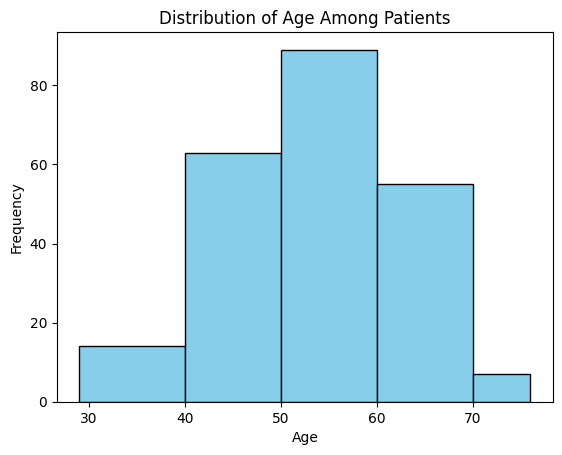

In [18]:
plt.hist(df['Age'],bins=[29,40,50,60,70,76],color='skyblue', edgecolor='black')
plt.title('Distribution of Age Among Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### 2) How many males and females are present in the dataset?

In [19]:
df['Sex'].value_counts()

Sex
1    154
0     74
Name: count, dtype: int64

<Axes: >

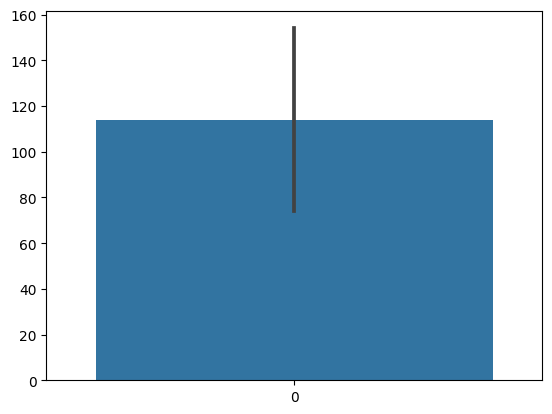

In [20]:
sns.barplot(df['Sex'].value_counts())

##### 3) What are the distribution and range of cholesterol levels among patients?

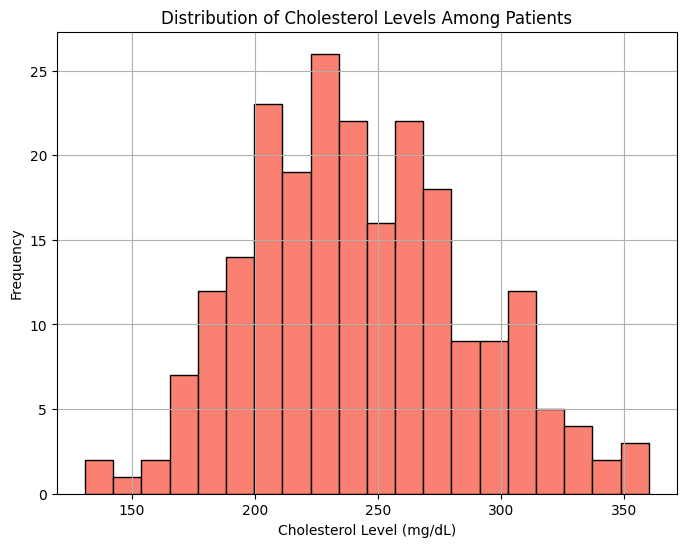

Minimum Cholesterol Level: 131
Maximum Cholesterol Level: 360
Mean Cholesterol Level: 242.37280701754386
Standard Deviation of Cholesterol Level: 44.32982664540809


In [21]:
cholesterol_data = df['Cholesterol']

# Summary statistics
cholesterol_min = cholesterol_data.min()
cholesterol_max = cholesterol_data.max()
cholesterol_mean = cholesterol_data.mean()
cholesterol_std = cholesterol_data.std()

# Plot the distribution of cholesterol levels
plt.figure(figsize=(8, 6))
plt.hist(cholesterol_data, bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Cholesterol Levels Among Patients')
plt.xlabel('Cholesterol Level (mg/dL)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print summary statistics
print("Minimum Cholesterol Level:", cholesterol_min)
print("Maximum Cholesterol Level:", cholesterol_max)
print("Mean Cholesterol Level:", cholesterol_mean)
print("Standard Deviation of Cholesterol Level:", cholesterol_std)


##### 4) What is the correlation between age and blood pressure (resting blood pressure)?

In [22]:
correlation=df[['Age','RestingBloodPressure']].corr()
correlation

,Age,RestingBloodPressure
Age,1.000000,0.266698
RestingBloodPressure,0.266698,1.000000


<Axes: >

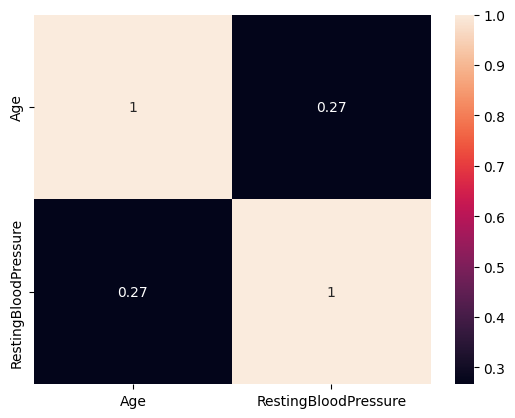

In [23]:
sns.heatmap(correlation,annot=True)

##### 5) How does chest pain type (cp) vary across different age groups?

In [24]:
df.columns

Index(['Age', 'Sex', 'ChestPain', 'RestingBloodPressure', 'Cholesterol',
       'FastingBloodSugar', 'RestingECG', 'MaxHeartRate', 'ExcerciseAngina',
       'OldPeak', 'STSlope', 'nMajorVessels', 'Thalium', 'Status'],
      dtype='object')

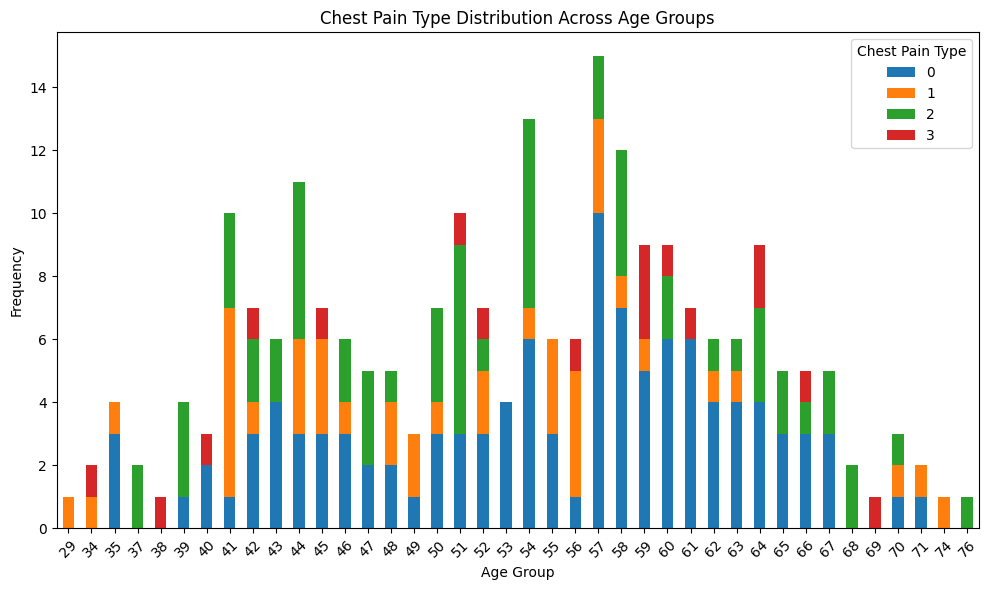

In [25]:

# Define age groups
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Add Age Group column
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by Age Group and Chest Pain Type (cp), and count occurrences
cp_age_group = df.groupby(['Age', 'ChestPain']).size().unstack(fill_value=0)

# Plot
cp_age_group.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Chest Pain Type Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Chest Pain Type', loc='upper right')
plt.tight_layout()
plt.show()


<div style="border-radius: 0px 40px; border: 2px solid #ffea00; padding: 10px; background-color: #6082B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">Data Encoding</h1>
</div>


- LableEncoding

In [26]:
for col in df.columns:
    df[col]=LabelEncoder().fit_transform(df[col])
df.head()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status,Age Group
1,3,1,2,19,72,0,1,76,0,31,0,0,1,1,1
2,7,0,1,19,31,0,0,64,0,14,2,0,1,1,2
3,22,1,1,11,60,0,1,69,0,8,2,0,1,1,3
4,23,0,0,11,130,0,1,55,1,6,2,0,1,1,3
5,23,1,0,25,21,0,1,40,0,4,1,0,0,1,3



<div style="border-radius: 0px 40px; border: 2px solid #ffea00; padding: 10px; background-color: #6082B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">Data Splitting </h1>
</div>

In [27]:
X=df.drop("Status",axis=1)
y=df['Status']

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
y_train.shape

(182,)

In [30]:
y_test.shape

(46,)


<div style="border-radius: 0px 40px; border: 2px solid #ffea00; padding: 10px; background-color: #6082B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">Feature Scaling </h1>
</div>

- StandardScaler

In [31]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [32]:
X_train

array([[-0.38888924,  0.7100227 ,  1.01151316, ...,  0.79624813,
         1.1794217 ,  0.08796633],
       [-0.94795592, -1.40840568,  0.03228233, ..., -0.6824984 ,
        -0.60936788, -0.97935845],
       [ 0.72924412, -1.40840568, -0.94694849, ...,  2.27499467,
         1.1794217 ,  1.1552911 ],
       ...,
       [ 1.17649747, -1.40840568, -0.94694849, ...,  2.27499467,
        -0.60936788,  1.1552911 ],
       [-0.72432925,  0.7100227 ,  1.01151316, ..., -0.6824984 ,
        -0.60936788, -0.97935845],
       [ 0.0583641 , -1.40840568,  1.01151316, ...,  0.79624813,
        -0.60936788,  0.08796633]])

In [33]:
X_test

array([[ 0.61743079,  0.7100227 ,  1.99074398,  0.40642648, -0.9516225 ,
         0.        ,  0.90732647,  0.54387622, -0.68391661, -0.16106452,
         1.01217049,  2.27499467, -0.60936788,  0.08796633],
       [-1.39520927,  0.7100227 ,  1.01151316, -1.01817361,  0.22579536,
         0.        ,  0.90732647,  1.34904529, -0.68391661, -0.99860002,
         1.01217049, -0.6824984 , -0.60936788, -0.97935845],
       [-0.61251591, -1.40840568,  1.01151316,  0.18725724,  0.88629806,
         0.        ,  0.90732647, -0.61355432, -0.68391661, -0.78921614,
         1.01217049, -0.6824984 , -0.60936788, -0.97935845],
       [ 0.0583641 ,  0.7100227 , -0.94694849, -1.12775823, -0.89418748,
         0.        , -1.01282954, -1.82130792,  1.46216655, -0.99860002,
        -0.67787565,  0.79624813, -0.60936788,  0.08796633],
       [-1.17158259,  0.7100227 , -0.94694849,  1.50227271,  0.13964283,
         0.        ,  0.90732647,  0.99678383, -0.68391661,  0.57177904,
         1.01217049, -0.68


<div style="border-radius: 0px 40px; border: 2px solid #ffea00; padding: 10px; background-color: #6082B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">Best Model Select</h1>
</div>

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [35]:
models={
    'LogisticRegression':LogisticRegression(),
    'SVC':SVC(),
    'GaussianNB':GaussianNB(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'XGBClassifier':XGBClassifier()
    }


<div style="border-radius: 0px 40px; border: 2px solid #ffea00; padding: 10px; background-color: #6082B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">Accuracy </h1>
</div>

- compare all model then batter Accuracy Score XGBClassifier is  0.87 rather then other model in this case/dataset 

In [36]:
%%time
model_scores = []
for names,model in models.items():
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  metric=accuracy_score(y_test,y_pred)
  model_scores.append((names,metric))

for model in model_scores:
    print('Accuracy Score', f"{model[0]} is {model[1]: .2f}") 

Accuracy Score LogisticRegression is  0.76
Accuracy Score SVC is  0.78
Accuracy Score GaussianNB is  0.74
Accuracy Score KNeighborsClassifier is  0.76
Accuracy Score DecisionTreeClassifier is  0.72
Accuracy Score RandomForestClassifier is  0.74
Accuracy Score GradientBoostingClassifier is  0.83
Accuracy Score XGBClassifier is  0.87
CPU times: user 497 ms, sys: 13.4 ms, total: 511 ms
Wall time: 393 ms



<div style="border-radius: 0px 40px; border: 2px solid #ffea00; padding: 10px; background-color: #6082B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">Confusion_matrix</h1>
</div>

In [37]:
%%time
model_scores = []
for names,model in models.items():
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  metric=confusion_matrix(y_test,y_pred)
  model_scores.append((names,metric))

for model in model_scores:
    print('confusion_matrix :\n ', model[0],'\n' ,model[1]) 


confusion_matrix :
  LogisticRegression 
 [[10 11]
 [ 0 25]]
confusion_matrix :
  SVC 
 [[12  9]
 [ 1 24]]
confusion_matrix :
  GaussianNB 
 [[13  8]
 [ 4 21]]
confusion_matrix :
  KNeighborsClassifier 
 [[12  9]
 [ 2 23]]
confusion_matrix :
  DecisionTreeClassifier 
 [[11 10]
 [ 4 21]]
confusion_matrix :
  RandomForestClassifier 
 [[12  9]
 [ 2 23]]
confusion_matrix :
  GradientBoostingClassifier 
 [[14  7]
 [ 1 24]]
confusion_matrix :
  XGBClassifier 
 [[15  6]
 [ 0 25]]
CPU times: user 437 ms, sys: 7.99 ms, total: 445 ms
Wall time: 336 ms


LogisticRegression
SVC
GaussianNB
KNeighborsClassifier
DecisionTreeClassifier
RandomForestClassifier
GradientBoostingClassifier
XGBClassifier


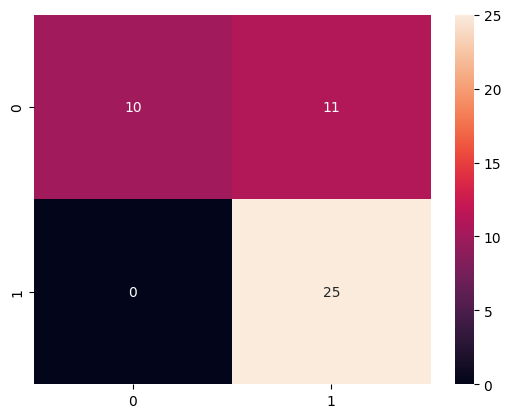

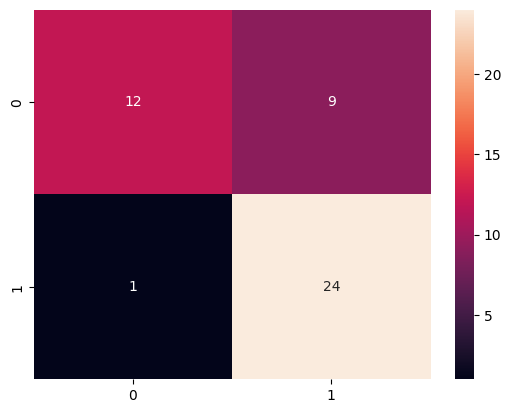

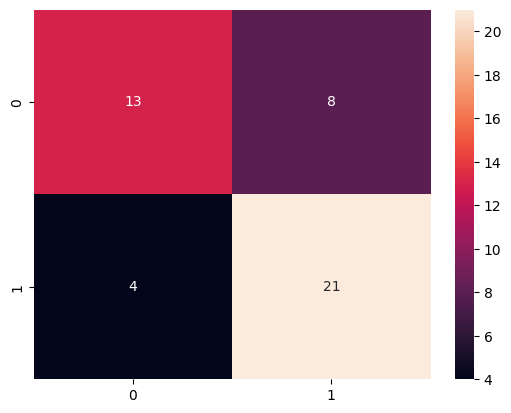

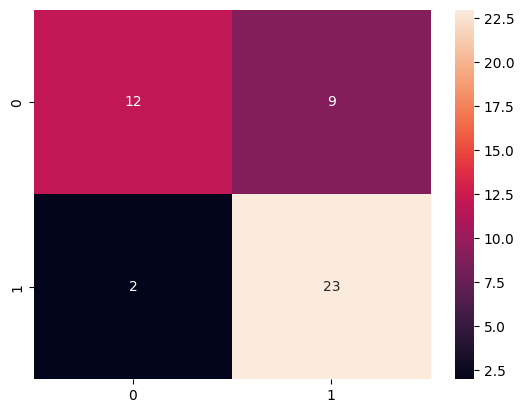

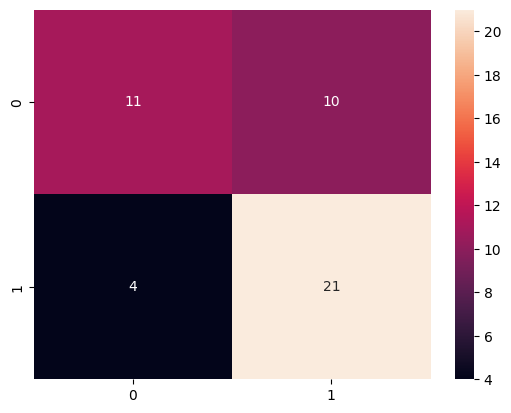

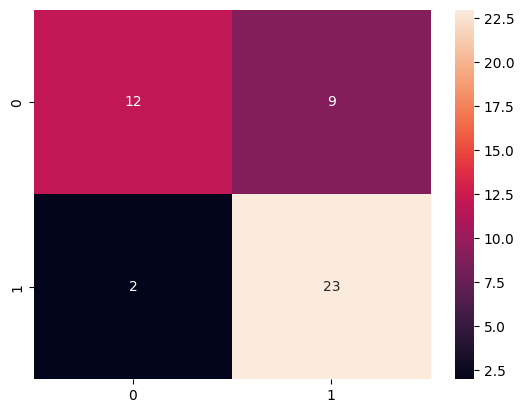

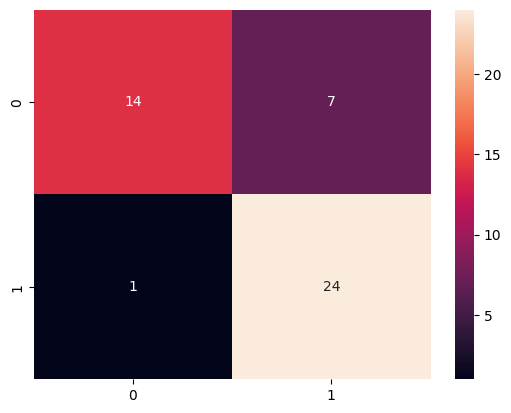

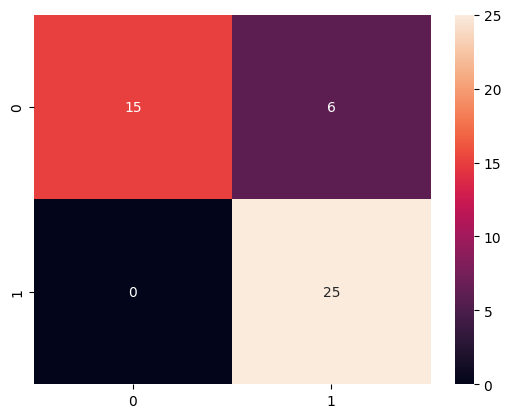

In [38]:
for model in model_scores:
    fig,ax=plt.subplots(nrows=1,ncols=1)
    print(model[0])
    sns.heatmap(model[1],annot=True)

<div style="border-radius: 0px 40px; border: 2px solid #ffea00; padding: 10px; background-color: #6082B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">classification_report</h1>
</div>

In [39]:
%%time
model_scores = []
for names,model in models.items():
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  metric=classification_report(y_test,y_pred)
  model_scores.append((names,metric))

for model in model_scores:
    print(model[0],'\n' ,model[1]) 


LogisticRegression 
               precision    recall  f1-score   support

           0       1.00      0.48      0.65        21
           1       0.69      1.00      0.82        25

    accuracy                           0.76        46
   macro avg       0.85      0.74      0.73        46
weighted avg       0.83      0.76      0.74        46

SVC 
               precision    recall  f1-score   support

           0       0.92      0.57      0.71        21
           1       0.73      0.96      0.83        25

    accuracy                           0.78        46
   macro avg       0.83      0.77      0.77        46
weighted avg       0.82      0.78      0.77        46

GaussianNB 
               precision    recall  f1-score   support

           0       0.76      0.62      0.68        21
           1       0.72      0.84      0.78        25

    accuracy                           0.74        46
   macro avg       0.74      0.73      0.73        46
weighted avg       0.74      0.74 